## IBM DATA SCIENCE PROFESSIONAL CERTIFICATE

### COURSE 9 - WEEK 3 - CAPSTONE PROJECT

#### YAN CARLOMAGNO

# Problem 1

Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

#### Step 1: scrape data from Wikipedia Page:

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [6]:
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')

#### Step 2: create pandas DataFrame with PostalCode, Borough, Neighborhood as columns names

In [7]:
column_names = ['PostalCode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)
df

,PostalCode,Borough,Neighborhood


#### Step 3: search wiki and save data to dataframe

In [9]:
for tr in table.find_all('tr'):
    row_data = []
    for td in tr.find_all('td'):
        row_data.append(td.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
355,M5Z,Not assigned,Not assigned
356,M6Z,Not assigned,Not assigned
357,M7Z,Not assigned,Not assigned
358,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


#### Step 4: data cleaning

- Drop Borough with "Not assigned" values
- Replace Neighborhood with "Not assigned" values with Borough value

In [11]:
df = df[df['Borough'] != 'Not assigned'].reset_index(drop=True)
df = df.groupby(['PostalCode', 'Borough'], as_index=False).agg(lambda x: ','.join(x))
temp = df['Neighborhood'] == 'Not assigned'
df.loc[temp, 'Neighborhood'] = df.loc[temp, 'Borough']
df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge,Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek,Rouge H..."
2,M1E,Scarborough,"Guildwood, Morningside, West Hill,Guildwood, M..."
3,M1G,Scarborough,"Woburn,Woburn"
4,M1H,Scarborough,"Cedarbrae,Cedarbrae"
...,...,...,...
98,M9N,York,"Weston,Weston"
99,M9P,Etobicoke,"Westmount,Westmount"
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [12]:
df.shape

(103, 3)

# Problem 2

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:

In [ ]:
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

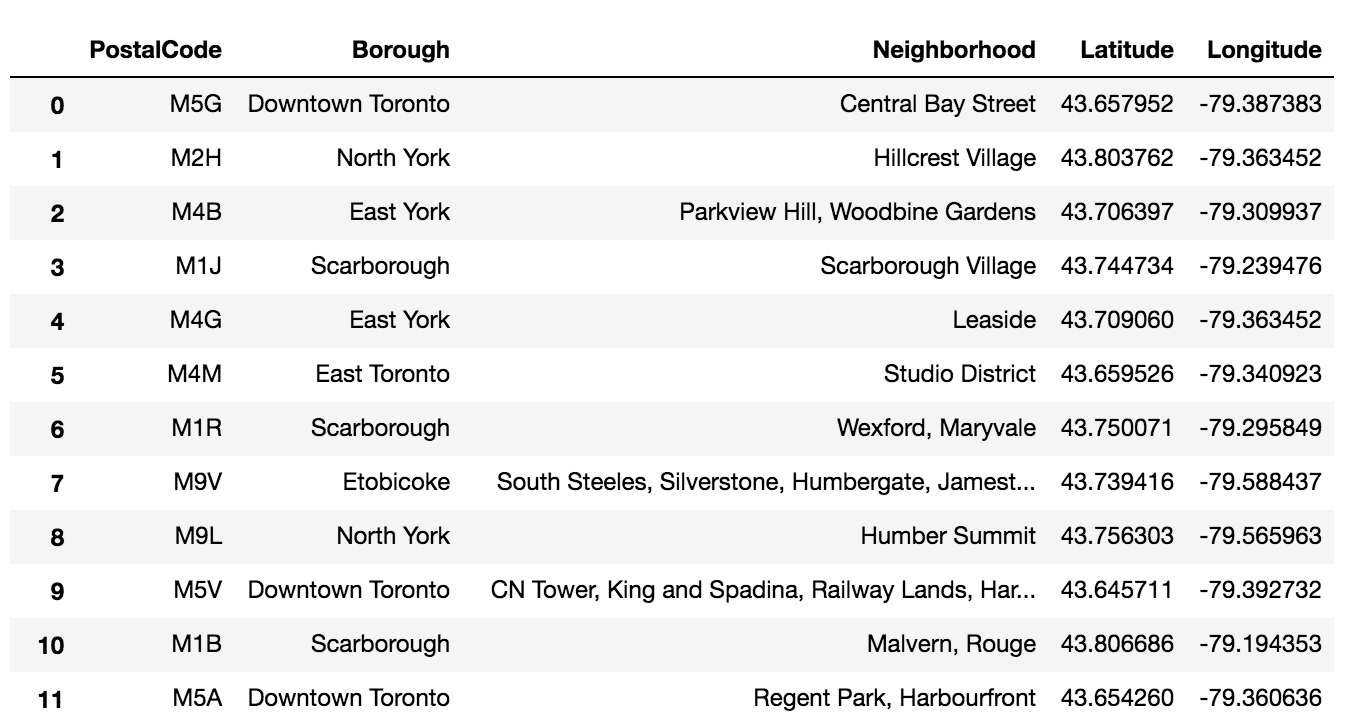https://github.com/yancarlomagno/Coursera_Capstone/blob/master/IBMDSPC_Course%209_Week%203_Capstone%20Project%20-%20Problem%202.ipynb

**Important Note:** There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

In [13]:
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

In [14]:
geo_df=pd.read_csv('http://cocl.us/Geospatial_data')
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [15]:
geo_df.rename(columns={'Postal Code':'PostalCode'}, inplace = True)
data_merge = pd.merge(geo_df, df, on = 'PostalCode')
data_merge

,PostalCode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge,Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek,Rouge H..."
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill,Guildwood, M..."
3,M1G,43.770992,-79.216917,Scarborough,"Woburn,Woburn"
4,M1H,43.773136,-79.239476,Scarborough,"Cedarbrae,Cedarbrae"
...,...,...,...,...,...
98,M9N,43.706876,-79.518188,York,"Weston,Weston"
99,M9P,43.696319,-79.532242,Etobicoke,"Westmount,Westmount"
100,M9R,43.688905,-79.554724,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,43.739416,-79.588437,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [16]:
df = data_merge[['PostalCode','Borough','Neighborhood','Latitude','Longitude']]
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge,Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek,Rouge H...",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill,Guildwood, M...",43.763573,-79.188711
3,M1G,Scarborough,"Woburn,Woburn",43.770992,-79.216917
4,M1H,Scarborough,"Cedarbrae,Cedarbrae",43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,"Weston,Weston",43.706876,-79.518188
99,M9P,Etobicoke,"Westmount,Westmount",43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437
